In [1]:
import pandas as pd
import os

import torch
import numpy as np
import matplotlib.pyplot as plt

import dask.dataframe as dd
import dask.array as da
import seaborn as sns
from scipy.stats import wasserstein_distance

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy.stats
import csv

from matplotlib import pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

# RQ1

Train
accuracy = 0.8245649129825965, p_hc=0.0024260067928190197
accuracy = 0.8441767068273093, p_hc=0.0
Eval
accuracy = 0.6979166666666666, p_hc=0.0
accuracy = 0.6353790613718412, p_hc=0.0


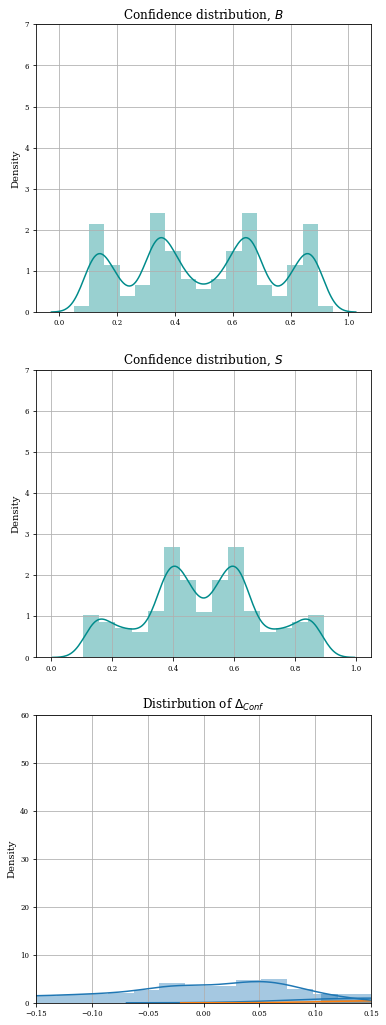

shapiro_test =(0.9454061985015869, 4.215673062687076e-27)
RTE mean delta confidence dist on train -0.03209329715336778
RTE mean delta confidence dist on eval -0.04267503185705705
RTE std delta confidence dist on train 0.10892479685028068
RTE std delta confidence dist on eval 0.12716674815130558
2082


0.9154658981748319

In [2]:
th = 0.9 

print("Train")
base_dir = "bert-base-uncased-rte"
dataset = "RTE"
data_dir =f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{base_dir}\\{dataset}_on_train"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_baseline_train = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6,18))
# fig, ax1 = plt.subplots(figsize=(6,6))
sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20), color='darkcyan', ax=ax1).set(title='Confidence distribution, $B$')
# baseline_train = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
ax1.set_ylim([0,7])
ax1.grid(True)


model_name = "TinyBERT_4L_312D_3ep_stg1_2_aug"
data_dir = f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{model_name}\\{dataset}_on_train"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_distill_train = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# fig, ax2 = plt.subplots(figsize=(6,6))
sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20), color='darkcyan', ax=ax2).set(title='Confidence distribution, $S$')
# baseline_train = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
ax2.set_ylim([0,7])
ax2.grid(True)
# plt.show()


print("Eval")
data_dir =f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{base_dir}\\{dataset}_on_eval"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_baseline_eval = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).set(title=data_dir)
baseline_eval = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
# plt.show()


data_dir = f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{model_name}\\{dataset}_on_eval"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_distill_eval = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).set(title=data_dir)
stg2_eval = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
# plt.show()

# # print(wasserstein_distance(baseline_train, stg2_train))
# # print(wasserstein_distance(baseline_eval, stg2_eval))

# print(f"{dataset} JS distance on train {jensen_shannon_distance(baseline_train, stg2_train)}")
# print(f"{dataset} JS distance on eval {jensen_shannon_distance(baseline_eval, stg2_eval)}")



df_baseline_train.columns = ['pred_baseline', 'p0_baseline', 'p1_baseline', 'label']
df_distill_train.columns = ['pred_distill', 'p0_distill', 'p1_distill', 'label_']
_ = pd.concat([df_baseline_train, df_distill_train], axis=1)
_correct = _[(_.pred_baseline == _.label) & (_.pred_distill == _.label)]
delta_confidence_p0_train = _correct.p0_baseline - _correct.p0_distill
# fig, ax3 = plt.subplots(figsize=(6,6))
delta_confidence_p0_train = delta_confidence_p0_train
sns.distplot(delta_confidence_p0_train,  color='tab:blue', ax=ax3)  #.set(title=data_dir)
ax3.set_title('Distirbution of $\Delta_{Conf}$')
ax3.set_ylim([0,60])
plt.xlim([-0.15,0.15])
# ax1.set_xlim([-0.03,0.03])

ax3.grid(True)
plt.show()

shapiro_test = scipy.stats.shapiro(delta_confidence_p0_train)
print(f'shapiro_test ={shapiro_test}')

df_baseline_eval.columns = ['pred_baseline', 'p0_baseline', 'p1_baseline', 'label']
df_distill_eval.columns = ['pred_distill', 'p0_distill', 'p1_distill', 'label_']
_ = pd.concat([df_baseline_eval, df_distill_eval], axis=1)
_correct = _[(_.pred_baseline == _.label) & (_.pred_distill == _.label)]
delta_confidence_p0_eval = _correct.p0_baseline - _correct.p0_distill
# sns.distplot(delta_confidence_p0_eval).set(title=data_dir)
# plt.show()

print(f"{dataset} mean delta confidence dist on train {np.mean(delta_confidence_p0_train)}")
print(f"{dataset} mean delta confidence dist on eval {np.mean(delta_confidence_p0_eval)}")

print(f"{dataset} std delta confidence dist on train {np.std(delta_confidence_p0_train)}")
print(f"{dataset} std delta confidence dist on eval {np.std(delta_confidence_p0_eval)}")
print(len(delta_confidence_p0_train))
sigma = np.std(delta_confidence_p0_train)
num = delta_confidence_p0_train[(delta_confidence_p0_train < 1.96*sigma) & (delta_confidence_p0_train >-1.96*sigma)] 
len(num)/len(delta_confidence_p0_train)

Train
accuracy = 0.811886586695747, p_hc=0.5480188045668234
accuracy = 0.7930752453653217, p_hc=0.20831900996906152
Eval
accuracy = 0.7867647058823529, p_hc=0.5607476635514018
accuracy = 0.7455072463768115, p_hc=0.17262830482115085


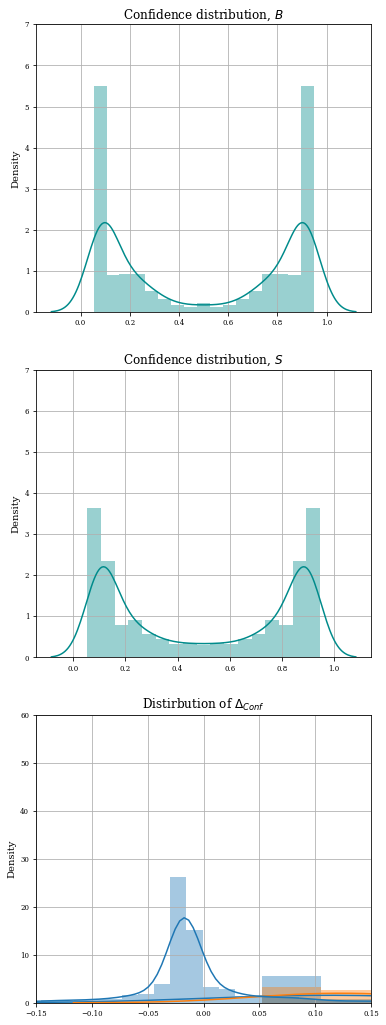

shapiro_test =(0.7863324880599976, 0.0)
MRPC mean delta confidence dist on train -0.01174016456007321
MRPC mean delta confidence dist on eval -0.0402644029190374
MRPC std delta confidence dist on train 0.0638842684741964
MRPC std delta confidence dist on eval 0.1313301750626514
2809


0.9248843004627981

In [10]:
th = 0.9 

print("Train")
base_dir = "bert-base-uncased-finetuned-mrpc"
dataset = "MRPC"
data_dir =f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{base_dir}\\{dataset}_on_train"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_baseline_train = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6,18))
# fig, ax1 = plt.subplots(figsize=(6,6))
sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20), color='darkcyan', ax=ax1).set(title='Confidence distribution, $B$')
# baseline_train = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
ax1.set_ylim([0,7])
ax1.grid(True)


model_name = "TinyBERT_4L_312D_3ep_stg1_2_aug"
data_dir = f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{model_name}\\{dataset}_on_train"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_distill_train = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# fig, ax2 = plt.subplots(figsize=(6,6))
sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20), color='darkcyan', ax=ax2).set(title='Confidence distribution, $S$')
# baseline_train = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
ax2.set_ylim([0,7])
ax2.grid(True)
# plt.show()


print("Eval")
data_dir =f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{base_dir}\\{dataset}_on_eval"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_baseline_eval = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).set(title=data_dir)
baseline_eval = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
# plt.show()


data_dir = f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{model_name}\\{dataset}_on_eval"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_distill_eval = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).set(title=data_dir)
stg2_eval = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
# plt.show()

# # print(wasserstein_distance(baseline_train, stg2_train))
# # print(wasserstein_distance(baseline_eval, stg2_eval))

# print(f"{dataset} JS distance on train {jensen_shannon_distance(baseline_train, stg2_train)}")
# print(f"{dataset} JS distance on eval {jensen_shannon_distance(baseline_eval, stg2_eval)}")



df_baseline_train.columns = ['pred_baseline', 'p0_baseline', 'p1_baseline', 'label']
df_distill_train.columns = ['pred_distill', 'p0_distill', 'p1_distill', 'label_']
_ = pd.concat([df_baseline_train, df_distill_train], axis=1)
_correct = _[(_.pred_baseline == _.label) & (_.pred_distill == _.label)]
delta_confidence_p0_train = _correct.p0_baseline - _correct.p0_distill
# fig, ax3 = plt.subplots(figsize=(6,6))
delta_confidence_p0_train = delta_confidence_p0_train
sns.distplot(delta_confidence_p0_train,  color='tab:blue', ax=ax3)  #.set(title=data_dir)
ax3.set_title('Distirbution of $\Delta_{Conf}$')
ax3.set_ylim([0,60])
plt.xlim([-0.15,0.15])
# ax1.set_xlim([-0.03,0.03])

ax3.grid(True)
plt.show()

shapiro_test = scipy.stats.shapiro(delta_confidence_p0_train)
print(f'shapiro_test ={shapiro_test}')

df_baseline_eval.columns = ['pred_baseline', 'p0_baseline', 'p1_baseline', 'label']
df_distill_eval.columns = ['pred_distill', 'p0_distill', 'p1_distill', 'label_']
_ = pd.concat([df_baseline_eval, df_distill_eval], axis=1)
_correct = _[(_.pred_baseline == _.label) & (_.pred_distill == _.label)]
delta_confidence_p0_eval = _correct.p0_baseline - _correct.p0_distill
# sns.distplot(delta_confidence_p0_eval).set(title=data_dir)
# plt.show()

print(f"{dataset} mean delta confidence dist on train {np.mean(delta_confidence_p0_train)}")
print(f"{dataset} mean delta confidence dist on eval {np.mean(delta_confidence_p0_eval)}")

print(f"{dataset} std delta confidence dist on train {np.std(delta_confidence_p0_train)}")
print(f"{dataset} std delta confidence dist on eval {np.std(delta_confidence_p0_eval)}")
print(len(delta_confidence_p0_train))
sigma = np.std(delta_confidence_p0_train)
num = delta_confidence_p0_train[(delta_confidence_p0_train < 1.96*sigma) & (delta_confidence_p0_train >-1.96*sigma)] 
len(num)/len(delta_confidence_p0_train)

Train
accuracy = 0.9685471325780688, p_hc=0.630317081060834
accuracy = 0.9232614897511584, p_hc=0.5702641958770559
Eval
accuracy = 0.9071481573089291, p_hc=0.6292670956483805
accuracy = 0.8904526341825377, p_hc=0.5682342157162301


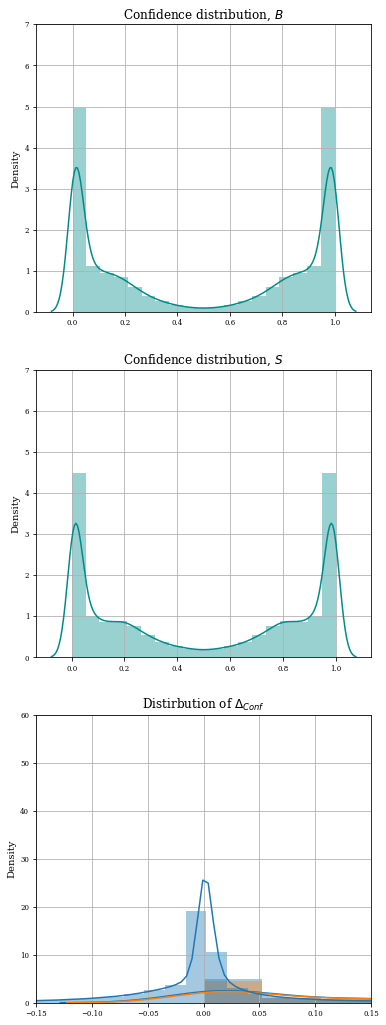

shapiro_test =(0.8118389248847961, 0.0)
QQP mean delta confidence dist on train 0.0024684598149056626
QQP mean delta confidence dist on eval 0.002130630457425005
QQP std delta confidence dist on train 0.07495794121967744
QQP std delta confidence dist on eval 0.07713962688935476
334032


0.9285637304210375

In [11]:
th = 0.9 

print("Train")
base_dir = "bert-base-uncased-QQP"
dataset = "QQP"
data_dir =f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{base_dir}\\{dataset}_on_train"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_baseline_train = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6,18))
# fig, ax1 = plt.subplots(figsize=(6,6))
sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20), color='darkcyan', ax=ax1).set(title='Confidence distribution, $B$')
# baseline_train = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
ax1.set_ylim([0,7])
ax1.grid(True)


model_name = "TinyBERT_4L_312D_3ep_stg1_2_aug"
data_dir = f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{model_name}\\{dataset}_on_train"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_distill_train = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# fig, ax2 = plt.subplots(figsize=(6,6))
sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20), color='darkcyan', ax=ax2).set(title='Confidence distribution, $S$')
# baseline_train = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
ax2.set_ylim([0,7])
ax2.grid(True)
# plt.show()


print("Eval")
data_dir =f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{base_dir}\\{dataset}_on_eval"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_baseline_eval = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).set(title=data_dir)
baseline_eval = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
# plt.show()


data_dir = f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{model_name}\\{dataset}_on_eval"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_distill_eval = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).set(title=data_dir)
stg2_eval = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
# plt.show()

# # print(wasserstein_distance(baseline_train, stg2_train))
# # print(wasserstein_distance(baseline_eval, stg2_eval))

# print(f"{dataset} JS distance on train {jensen_shannon_distance(baseline_train, stg2_train)}")
# print(f"{dataset} JS distance on eval {jensen_shannon_distance(baseline_eval, stg2_eval)}")



df_baseline_train.columns = ['pred_baseline', 'p0_baseline', 'p1_baseline', 'label']
df_distill_train.columns = ['pred_distill', 'p0_distill', 'p1_distill', 'label_']
_ = pd.concat([df_baseline_train, df_distill_train], axis=1)
_correct = _[(_.pred_baseline == _.label) & (_.pred_distill == _.label)]
delta_confidence_p0_train = _correct.p0_baseline - _correct.p0_distill
# fig, ax3 = plt.subplots(figsize=(6,6))
delta_confidence_p0_train = delta_confidence_p0_train
sns.distplot(delta_confidence_p0_train,  color='tab:blue', ax=ax3)  #.set(title=data_dir)
ax3.set_title('Distirbution of $\Delta_{Conf}$')
ax3.set_ylim([0,60])
plt.xlim([-0.15,0.15])
# ax1.set_xlim([-0.03,0.03])

ax3.grid(True)
plt.show()

shapiro_test = scipy.stats.shapiro(delta_confidence_p0_train)
print(f'shapiro_test ={shapiro_test}')

df_baseline_eval.columns = ['pred_baseline', 'p0_baseline', 'p1_baseline', 'label']
df_distill_eval.columns = ['pred_distill', 'p0_distill', 'p1_distill', 'label_']
_ = pd.concat([df_baseline_eval, df_distill_eval], axis=1)
_correct = _[(_.pred_baseline == _.label) & (_.pred_distill == _.label)]
delta_confidence_p0_eval = _correct.p0_baseline - _correct.p0_distill
# sns.distplot(delta_confidence_p0_eval).set(title=data_dir)
# plt.show()

print(f"{dataset} mean delta confidence dist on train {np.mean(delta_confidence_p0_train)}")
print(f"{dataset} mean delta confidence dist on eval {np.mean(delta_confidence_p0_eval)}")

print(f"{dataset} std delta confidence dist on train {np.std(delta_confidence_p0_train)}")
print(f"{dataset} std delta confidence dist on eval {np.std(delta_confidence_p0_eval)}")
print(len(delta_confidence_p0_train))
sigma = np.std(delta_confidence_p0_train)
num = delta_confidence_p0_train[(delta_confidence_p0_train < 1.96*sigma) & (delta_confidence_p0_train >-1.96*sigma)] 
len(num)/len(delta_confidence_p0_train)

Train
accuracy = 0.9755783202696123, p_hc=0.6016734354357293
accuracy = 0.9189540112465749, p_hc=0.4590458578344796
Eval
accuracy = 0.9136005857587406, p_hc=0.5912642756962533
accuracy = 0.866190737689914, p_hc=0.4378698224852071


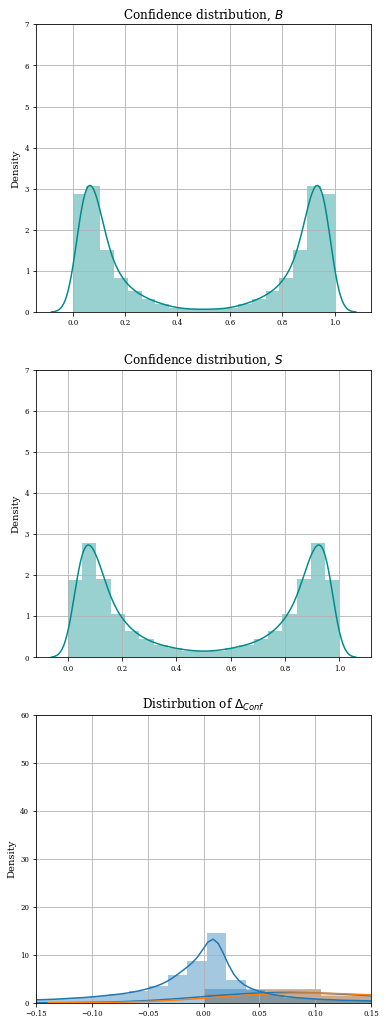

shapiro_test =(0.8899123668670654, 0.0)
QNLI mean delta confidence dist on train -0.006313226273413495
QNLI mean delta confidence dist on eval -0.0075789564791826185
QNLI std delta confidence dist on train 0.08071963810939263
QNLI std delta confidence dist on eval 0.09509819178256193
95900


0.925422314911366

In [12]:
th = 0.9 

print("Train")
base_dir = "bert-base-uncased-QNLI"
dataset = "QNLI"
data_dir =f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{base_dir}\\{dataset}_on_train"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_baseline_train = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6,18))
# fig, ax1 = plt.subplots(figsize=(6,6))
sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20), color='darkcyan', ax=ax1).set(title='Confidence distribution, $B$')
# baseline_train = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
ax1.set_ylim([0,7])
ax1.grid(True)


model_name = "TinyBERT_4L_312D_3ep_stg1_2_aug"
data_dir = f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{model_name}\\{dataset}_on_train"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_distill_train = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# fig, ax2 = plt.subplots(figsize=(6,6))
sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20), color='darkcyan', ax=ax2).set(title='Confidence distribution, $S$')
# baseline_train = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
ax2.set_ylim([0,7])
ax2.grid(True)
# plt.show()


print("Eval")
data_dir =f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{base_dir}\\{dataset}_on_eval"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_baseline_eval = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).set(title=data_dir)
baseline_eval = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
# plt.show()


data_dir = f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{model_name}\\{dataset}_on_eval"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_distill_eval = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).set(title=data_dir)
stg2_eval = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
# plt.show()

# # print(wasserstein_distance(baseline_train, stg2_train))
# # print(wasserstein_distance(baseline_eval, stg2_eval))

# print(f"{dataset} JS distance on train {jensen_shannon_distance(baseline_train, stg2_train)}")
# print(f"{dataset} JS distance on eval {jensen_shannon_distance(baseline_eval, stg2_eval)}")



df_baseline_train.columns = ['pred_baseline', 'p0_baseline', 'p1_baseline', 'label']
df_distill_train.columns = ['pred_distill', 'p0_distill', 'p1_distill', 'label_']
_ = pd.concat([df_baseline_train, df_distill_train], axis=1)
_correct = _[(_.pred_baseline == _.label) & (_.pred_distill == _.label)]
delta_confidence_p0_train = _correct.p0_baseline - _correct.p0_distill
# fig, ax3 = plt.subplots(figsize=(6,6))
delta_confidence_p0_train = delta_confidence_p0_train
sns.distplot(delta_confidence_p0_train,  color='tab:blue', ax=ax3)  #.set(title=data_dir)
ax3.set_title('Distirbution of $\Delta_{Conf}$')
ax3.set_ylim([0,60])
plt.xlim([-0.15,0.15])
# ax1.set_xlim([-0.03,0.03])

ax3.grid(True)
plt.show()

shapiro_test = scipy.stats.shapiro(delta_confidence_p0_train)
print(f'shapiro_test ={shapiro_test}')

df_baseline_eval.columns = ['pred_baseline', 'p0_baseline', 'p1_baseline', 'label']
df_distill_eval.columns = ['pred_distill', 'p0_distill', 'p1_distill', 'label_']
_ = pd.concat([df_baseline_eval, df_distill_eval], axis=1)
_correct = _[(_.pred_baseline == _.label) & (_.pred_distill == _.label)]
delta_confidence_p0_eval = _correct.p0_baseline - _correct.p0_distill
# sns.distplot(delta_confidence_p0_eval).set(title=data_dir)
# plt.show()

print(f"{dataset} mean delta confidence dist on train {np.mean(delta_confidence_p0_train)}")
print(f"{dataset} mean delta confidence dist on eval {np.mean(delta_confidence_p0_eval)}")

print(f"{dataset} std delta confidence dist on train {np.std(delta_confidence_p0_train)}")
print(f"{dataset} std delta confidence dist on eval {np.std(delta_confidence_p0_eval)}")
print(len(delta_confidence_p0_train))
sigma = np.std(delta_confidence_p0_train)
num = delta_confidence_p0_train[(delta_confidence_p0_train < 1.96*sigma) & (delta_confidence_p0_train >-1.96*sigma)] 
len(num)/len(delta_confidence_p0_train)

Train
accuracy = 0.9841126074626201, p_hc=0.8975542781273103
accuracy = 0.9656416576341148, p_hc=0.8705312524025525
Eval
accuracy = 0.930045871559633, p_hc=0.8298397040690506
accuracy = 0.8910550458715596, p_hc=0.8005148005148005


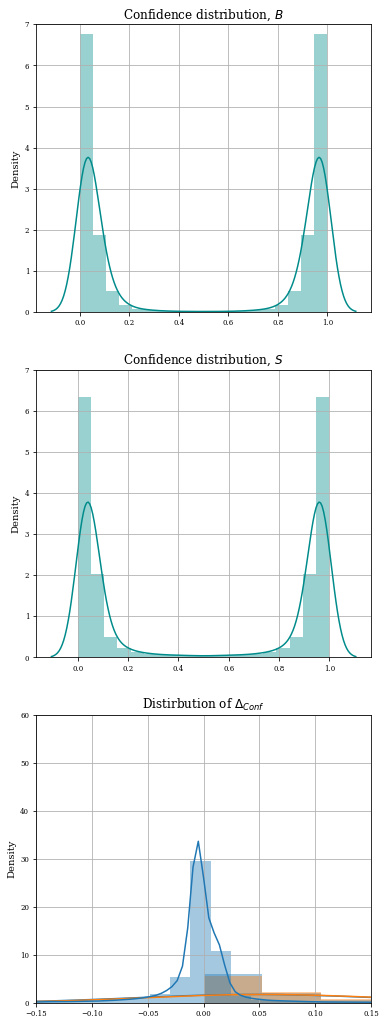

shapiro_test =(0.6025979518890381, 0.0)
SST-2 mean delta confidence dist on train -0.005603953766351445
SST-2 mean delta confidence dist on eval -0.012349426476419838
SST-2 std delta confidence dist on train 0.05076916814678272
SST-2 std delta confidence dist on eval 0.07580703282940048
64894


0.9501648842728141

In [13]:
th = 0.9 

print("Train")
base_dir = "bert-base-uncased-finetuned-sst2"
dataset = "SST-2"
data_dir =f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{base_dir}\\{dataset}_on_train"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_baseline_train = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6,18))
# fig, ax1 = plt.subplots(figsize=(6,6))
sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20), color='darkcyan', ax=ax1).set(title='Confidence distribution, $B$')
# baseline_train = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
ax1.set_ylim([0,7])
ax1.grid(True)


model_name = "TinyBERT_4L_312D_3ep_stg1_2_aug"
data_dir = f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{model_name}\\{dataset}_on_train"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_distill_train = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# fig, ax2 = plt.subplots(figsize=(6,6))
sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20), color='darkcyan', ax=ax2).set(title='Confidence distribution, $S$')
# baseline_train = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
ax2.set_ylim([0,7])
ax2.grid(True)
# plt.show()


print("Eval")
data_dir =f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{base_dir}\\{dataset}_on_eval"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_baseline_eval = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).set(title=data_dir)
baseline_eval = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
# plt.show()


data_dir = f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{model_name}\\{dataset}_on_eval"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_distill_eval = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).set(title=data_dir)
stg2_eval = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
# plt.show()

# # print(wasserstein_distance(baseline_train, stg2_train))
# # print(wasserstein_distance(baseline_eval, stg2_eval))

# print(f"{dataset} JS distance on train {jensen_shannon_distance(baseline_train, stg2_train)}")
# print(f"{dataset} JS distance on eval {jensen_shannon_distance(baseline_eval, stg2_eval)}")



df_baseline_train.columns = ['pred_baseline', 'p0_baseline', 'p1_baseline', 'label']
df_distill_train.columns = ['pred_distill', 'p0_distill', 'p1_distill', 'label_']
_ = pd.concat([df_baseline_train, df_distill_train], axis=1)
_correct = _[(_.pred_baseline == _.label) & (_.pred_distill == _.label)]
delta_confidence_p0_train = _correct.p0_baseline - _correct.p0_distill
# fig, ax3 = plt.subplots(figsize=(6,6))
delta_confidence_p0_train = delta_confidence_p0_train
sns.distplot(delta_confidence_p0_train,  color='tab:blue', ax=ax3)  #.set(title=data_dir)
ax3.set_title('Distirbution of $\Delta_{Conf}$')
ax3.set_ylim([0,60])
plt.xlim([-0.15,0.15])
# ax1.set_xlim([-0.03,0.03])

ax3.grid(True)
plt.show()

shapiro_test = scipy.stats.shapiro(delta_confidence_p0_train)
print(f'shapiro_test ={shapiro_test}')

df_baseline_eval.columns = ['pred_baseline', 'p0_baseline', 'p1_baseline', 'label']
df_distill_eval.columns = ['pred_distill', 'p0_distill', 'p1_distill', 'label_']
_ = pd.concat([df_baseline_eval, df_distill_eval], axis=1)
_correct = _[(_.pred_baseline == _.label) & (_.pred_distill == _.label)]
delta_confidence_p0_eval = _correct.p0_baseline - _correct.p0_distill
# sns.distplot(delta_confidence_p0_eval).set(title=data_dir)
# plt.show()

print(f"{dataset} mean delta confidence dist on train {np.mean(delta_confidence_p0_train)}")
print(f"{dataset} mean delta confidence dist on eval {np.mean(delta_confidence_p0_eval)}")

print(f"{dataset} std delta confidence dist on train {np.std(delta_confidence_p0_train)}")
print(f"{dataset} std delta confidence dist on eval {np.std(delta_confidence_p0_eval)}")
print(len(delta_confidence_p0_train))
sigma = np.std(delta_confidence_p0_train)
num = delta_confidence_p0_train[(delta_confidence_p0_train < 1.96*sigma) & (delta_confidence_p0_train >-1.96*sigma)] 
len(num)/len(delta_confidence_p0_train)

# RQ2

Train
accuracy = 0.8245649129825965, p_hc=0.0024260067928190197
accuracy = 0.8353413654618473, p_hc=0.0
Eval
accuracy = 0.6979166666666666, p_hc=0.0
accuracy = 0.6606498194945848, p_hc=0.0


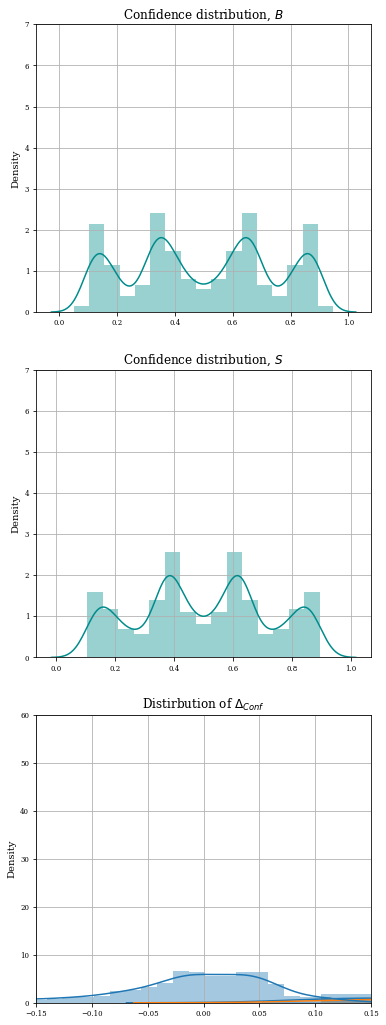

shapiro_test =(0.9044278264045715, 3.941067512209902e-34)
RTE mean delta confidence dist on train -0.019521556044899444
RTE mean delta confidence dist on eval -0.020821160537266886
RTE std delta confidence dist on train 0.08794557079557397
RTE std delta confidence dist on eval 0.0899667183169123
2067


0.9216255442670537

In [2]:
th = 0.9 

print("Train")
base_dir = "bert-base-uncased-rte"
dataset = "RTE"
data_dir =f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{base_dir}\\{dataset}_on_train"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_baseline_train = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6,18))
# fig, ax1 = plt.subplots(figsize=(6,6))
sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20), color='darkcyan', ax=ax1).set(title='Confidence distribution, $B$')
# baseline_train = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
ax1.set_ylim([0,7])
ax1.grid(True)


model_name = "TinyBERT_4L_312D_traintest_3ep_stg1_2_aug"
data_dir = f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{model_name}\\{dataset}_on_train"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_distill_train = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# fig, ax2 = plt.subplots(figsize=(6,6))
sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20), color='darkcyan', ax=ax2).set(title='Confidence distribution, $S$')
# baseline_train = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
ax2.set_ylim([0,7])
ax2.grid(True)
# plt.show()


print("Eval")
data_dir =f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{base_dir}\\{dataset}_on_eval"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_baseline_eval = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).set(title=data_dir)
baseline_eval = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
# plt.show()


data_dir = f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{model_name}\\{dataset}_on_eval"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_distill_eval = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).set(title=data_dir)
stg2_eval = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
# plt.show()

# # print(wasserstein_distance(baseline_train, stg2_train))
# # print(wasserstein_distance(baseline_eval, stg2_eval))

# print(f"{dataset} JS distance on train {jensen_shannon_distance(baseline_train, stg2_train)}")
# print(f"{dataset} JS distance on eval {jensen_shannon_distance(baseline_eval, stg2_eval)}")



df_baseline_train.columns = ['pred_baseline', 'p0_baseline', 'p1_baseline', 'label']
df_distill_train.columns = ['pred_distill', 'p0_distill', 'p1_distill', 'label_']
_ = pd.concat([df_baseline_train, df_distill_train], axis=1)
_correct = _[(_.pred_baseline == _.label) & (_.pred_distill == _.label)]
delta_confidence_p0_train = _correct.p0_baseline - _correct.p0_distill
# fig, ax3 = plt.subplots(figsize=(6,6))
delta_confidence_p0_train = delta_confidence_p0_train
sns.distplot(delta_confidence_p0_train,  color='tab:blue', ax=ax3)  #.set(title=data_dir)
ax3.set_title('Distirbution of $\Delta_{Conf}$')
ax3.set_ylim([0,60])
plt.xlim([-0.15,0.15])
# ax1.set_xlim([-0.03,0.03])

ax3.grid(True)
plt.show()

shapiro_test = scipy.stats.shapiro(delta_confidence_p0_train)
print(f'shapiro_test ={shapiro_test}')

df_baseline_eval.columns = ['pred_baseline', 'p0_baseline', 'p1_baseline', 'label']
df_distill_eval.columns = ['pred_distill', 'p0_distill', 'p1_distill', 'label_']
_ = pd.concat([df_baseline_eval, df_distill_eval], axis=1)
_correct = _[(_.pred_baseline == _.label) & (_.pred_distill == _.label)]
delta_confidence_p0_eval = _correct.p0_baseline - _correct.p0_distill
# sns.distplot(delta_confidence_p0_eval).set(title=data_dir)
# plt.show()

print(f"{dataset} mean delta confidence dist on train {np.mean(delta_confidence_p0_train)}")
print(f"{dataset} mean delta confidence dist on eval {np.mean(delta_confidence_p0_eval)}")

print(f"{dataset} std delta confidence dist on train {np.std(delta_confidence_p0_train)}")
print(f"{dataset} std delta confidence dist on eval {np.std(delta_confidence_p0_eval)}")
print(len(delta_confidence_p0_train))
sigma = np.std(delta_confidence_p0_train)
num = delta_confidence_p0_train[(delta_confidence_p0_train < 1.96*sigma) & (delta_confidence_p0_train >-1.96*sigma)] 
len(num)/len(delta_confidence_p0_train)

Train
accuracy = 0.811886586695747, p_hc=0.5480188045668234
accuracy = 0.8023446019629226, p_hc=0.42473666326877335
Eval
accuracy = 0.7867647058823529, p_hc=0.5607476635514018
accuracy = 0.7553623188405797, p_hc=0.40214888718342284


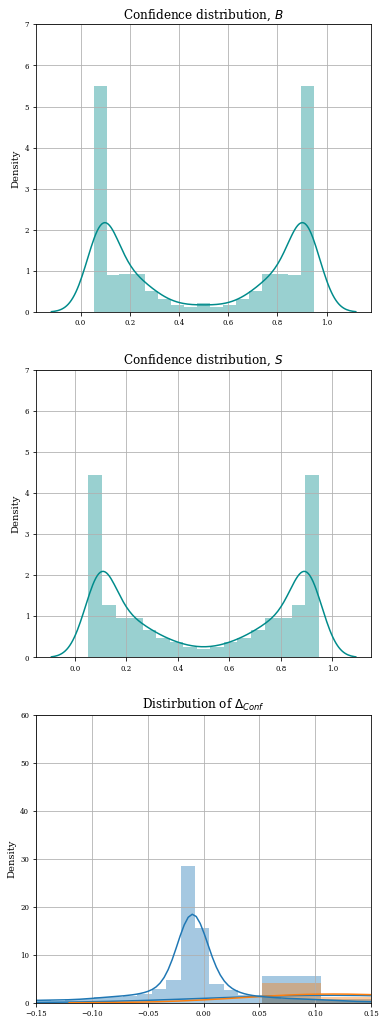

shapiro_test =(0.8136863708496094, 0.0)
MRPC mean delta confidence dist on train -0.012769658836489284
MRPC mean delta confidence dist on eval -0.04158444930389137
MRPC std delta confidence dist on train 0.05844119180777239
MRPC std delta confidence dist on eval 0.14360835567178437
2864


0.9217877094972067

In [3]:
th = 0.9 

print("Train")
base_dir = "bert-base-uncased-finetuned-mrpc"
dataset = "MRPC"
data_dir =f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{base_dir}\\{dataset}_on_train"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_baseline_train = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6,18))
# fig, ax1 = plt.subplots(figsize=(6,6))
sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20), color='darkcyan', ax=ax1).set(title='Confidence distribution, $B$')
# baseline_train = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
ax1.set_ylim([0,7])
ax1.grid(True)


model_name = "TinyBERT_4L_312D_traintest_3ep_stg1_2_aug"
data_dir = f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{model_name}\\{dataset}_on_train"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_distill_train = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# fig, ax2 = plt.subplots(figsize=(6,6))
sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20), color='darkcyan', ax=ax2).set(title='Confidence distribution, $S$')
# baseline_train = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
ax2.set_ylim([0,7])
ax2.grid(True)
# plt.show()


print("Eval")
data_dir =f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{base_dir}\\{dataset}_on_eval"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_baseline_eval = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).set(title=data_dir)
baseline_eval = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
# plt.show()


data_dir = f"E:\\Dima\\PhD\\Repos\\distill_abstraction\\eval_results\\{model_name}\\{dataset}_on_eval"
fname = os.path.join(data_dir, "eval_results.csv")
df = dd.read_csv(fname)
df_distill_eval = pd.read_csv(fname)
accuracy = len(df[df['pred']==df['label']])/len(df['pred'])
df_correct = df[df['pred']==df['label']]
df_correct_high_conf = df_correct[df_correct[['p0','p1']].max(axis=1)>th]
p_hc = len(df_correct_high_conf)/len(df_correct)
print(f'accuracy = {accuracy}, p_hc={p_hc}')
# sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).set(title=data_dir)
stg2_eval = [h.get_height() for h in sns.distplot(df_correct[['p0','p1']].compute(), bins=np.linspace(0, 1, num=20)).patches]
# plt.show()

# # print(wasserstein_distance(baseline_train, stg2_train))
# # print(wasserstein_distance(baseline_eval, stg2_eval))

# print(f"{dataset} JS distance on train {jensen_shannon_distance(baseline_train, stg2_train)}")
# print(f"{dataset} JS distance on eval {jensen_shannon_distance(baseline_eval, stg2_eval)}")



df_baseline_train.columns = ['pred_baseline', 'p0_baseline', 'p1_baseline', 'label']
df_distill_train.columns = ['pred_distill', 'p0_distill', 'p1_distill', 'label_']
_ = pd.concat([df_baseline_train, df_distill_train], axis=1)
_correct = _[(_.pred_baseline == _.label) & (_.pred_distill == _.label)]
delta_confidence_p0_train = _correct.p0_baseline - _correct.p0_distill
# fig, ax3 = plt.subplots(figsize=(6,6))
delta_confidence_p0_train = delta_confidence_p0_train
sns.distplot(delta_confidence_p0_train,  color='tab:blue', ax=ax3)  #.set(title=data_dir)
ax3.set_title('Distirbution of $\Delta_{Conf}$')
ax3.set_ylim([0,60])
plt.xlim([-0.15,0.15])
# ax1.set_xlim([-0.03,0.03])

ax3.grid(True)
plt.show()

shapiro_test = scipy.stats.shapiro(delta_confidence_p0_train)
print(f'shapiro_test ={shapiro_test}')

df_baseline_eval.columns = ['pred_baseline', 'p0_baseline', 'p1_baseline', 'label']
df_distill_eval.columns = ['pred_distill', 'p0_distill', 'p1_distill', 'label_']
_ = pd.concat([df_baseline_eval, df_distill_eval], axis=1)
_correct = _[(_.pred_baseline == _.label) & (_.pred_distill == _.label)]
delta_confidence_p0_eval = _correct.p0_baseline - _correct.p0_distill
# sns.distplot(delta_confidence_p0_eval).set(title=data_dir)
# plt.show()

print(f"{dataset} mean delta confidence dist on train {np.mean(delta_confidence_p0_train)}")
print(f"{dataset} mean delta confidence dist on eval {np.mean(delta_confidence_p0_eval)}")

print(f"{dataset} std delta confidence dist on train {np.std(delta_confidence_p0_train)}")
print(f"{dataset} std delta confidence dist on eval {np.std(delta_confidence_p0_eval)}")
print(len(delta_confidence_p0_train))
sigma = np.std(delta_confidence_p0_train)
num = delta_confidence_p0_train[(delta_confidence_p0_train < 1.96*sigma) & (delta_confidence_p0_train >-1.96*sigma)] 
len(num)/len(delta_confidence_p0_train)